In [17]:
import pandas as pd

seed = 's1'

# Double Pole
base = '../../../../datalake/data_baseline/data/xdpole/initialconditions'
n_features = 6

ic = pd.read_csv(f"{base}/{seed}_run.csv")

In [18]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from utils import get_label
from sklearn.preprocessing import StandardScaler

sampler = RandomOverSampler(random_state=0)

features = ic.columns[[i for i in range(n_features)]]
target = 'performance'
X, y = ic[features], ic[target]

X = StandardScaler().fit_transform(X, y)

<Axes: xlabel='performance', ylabel='Count'>

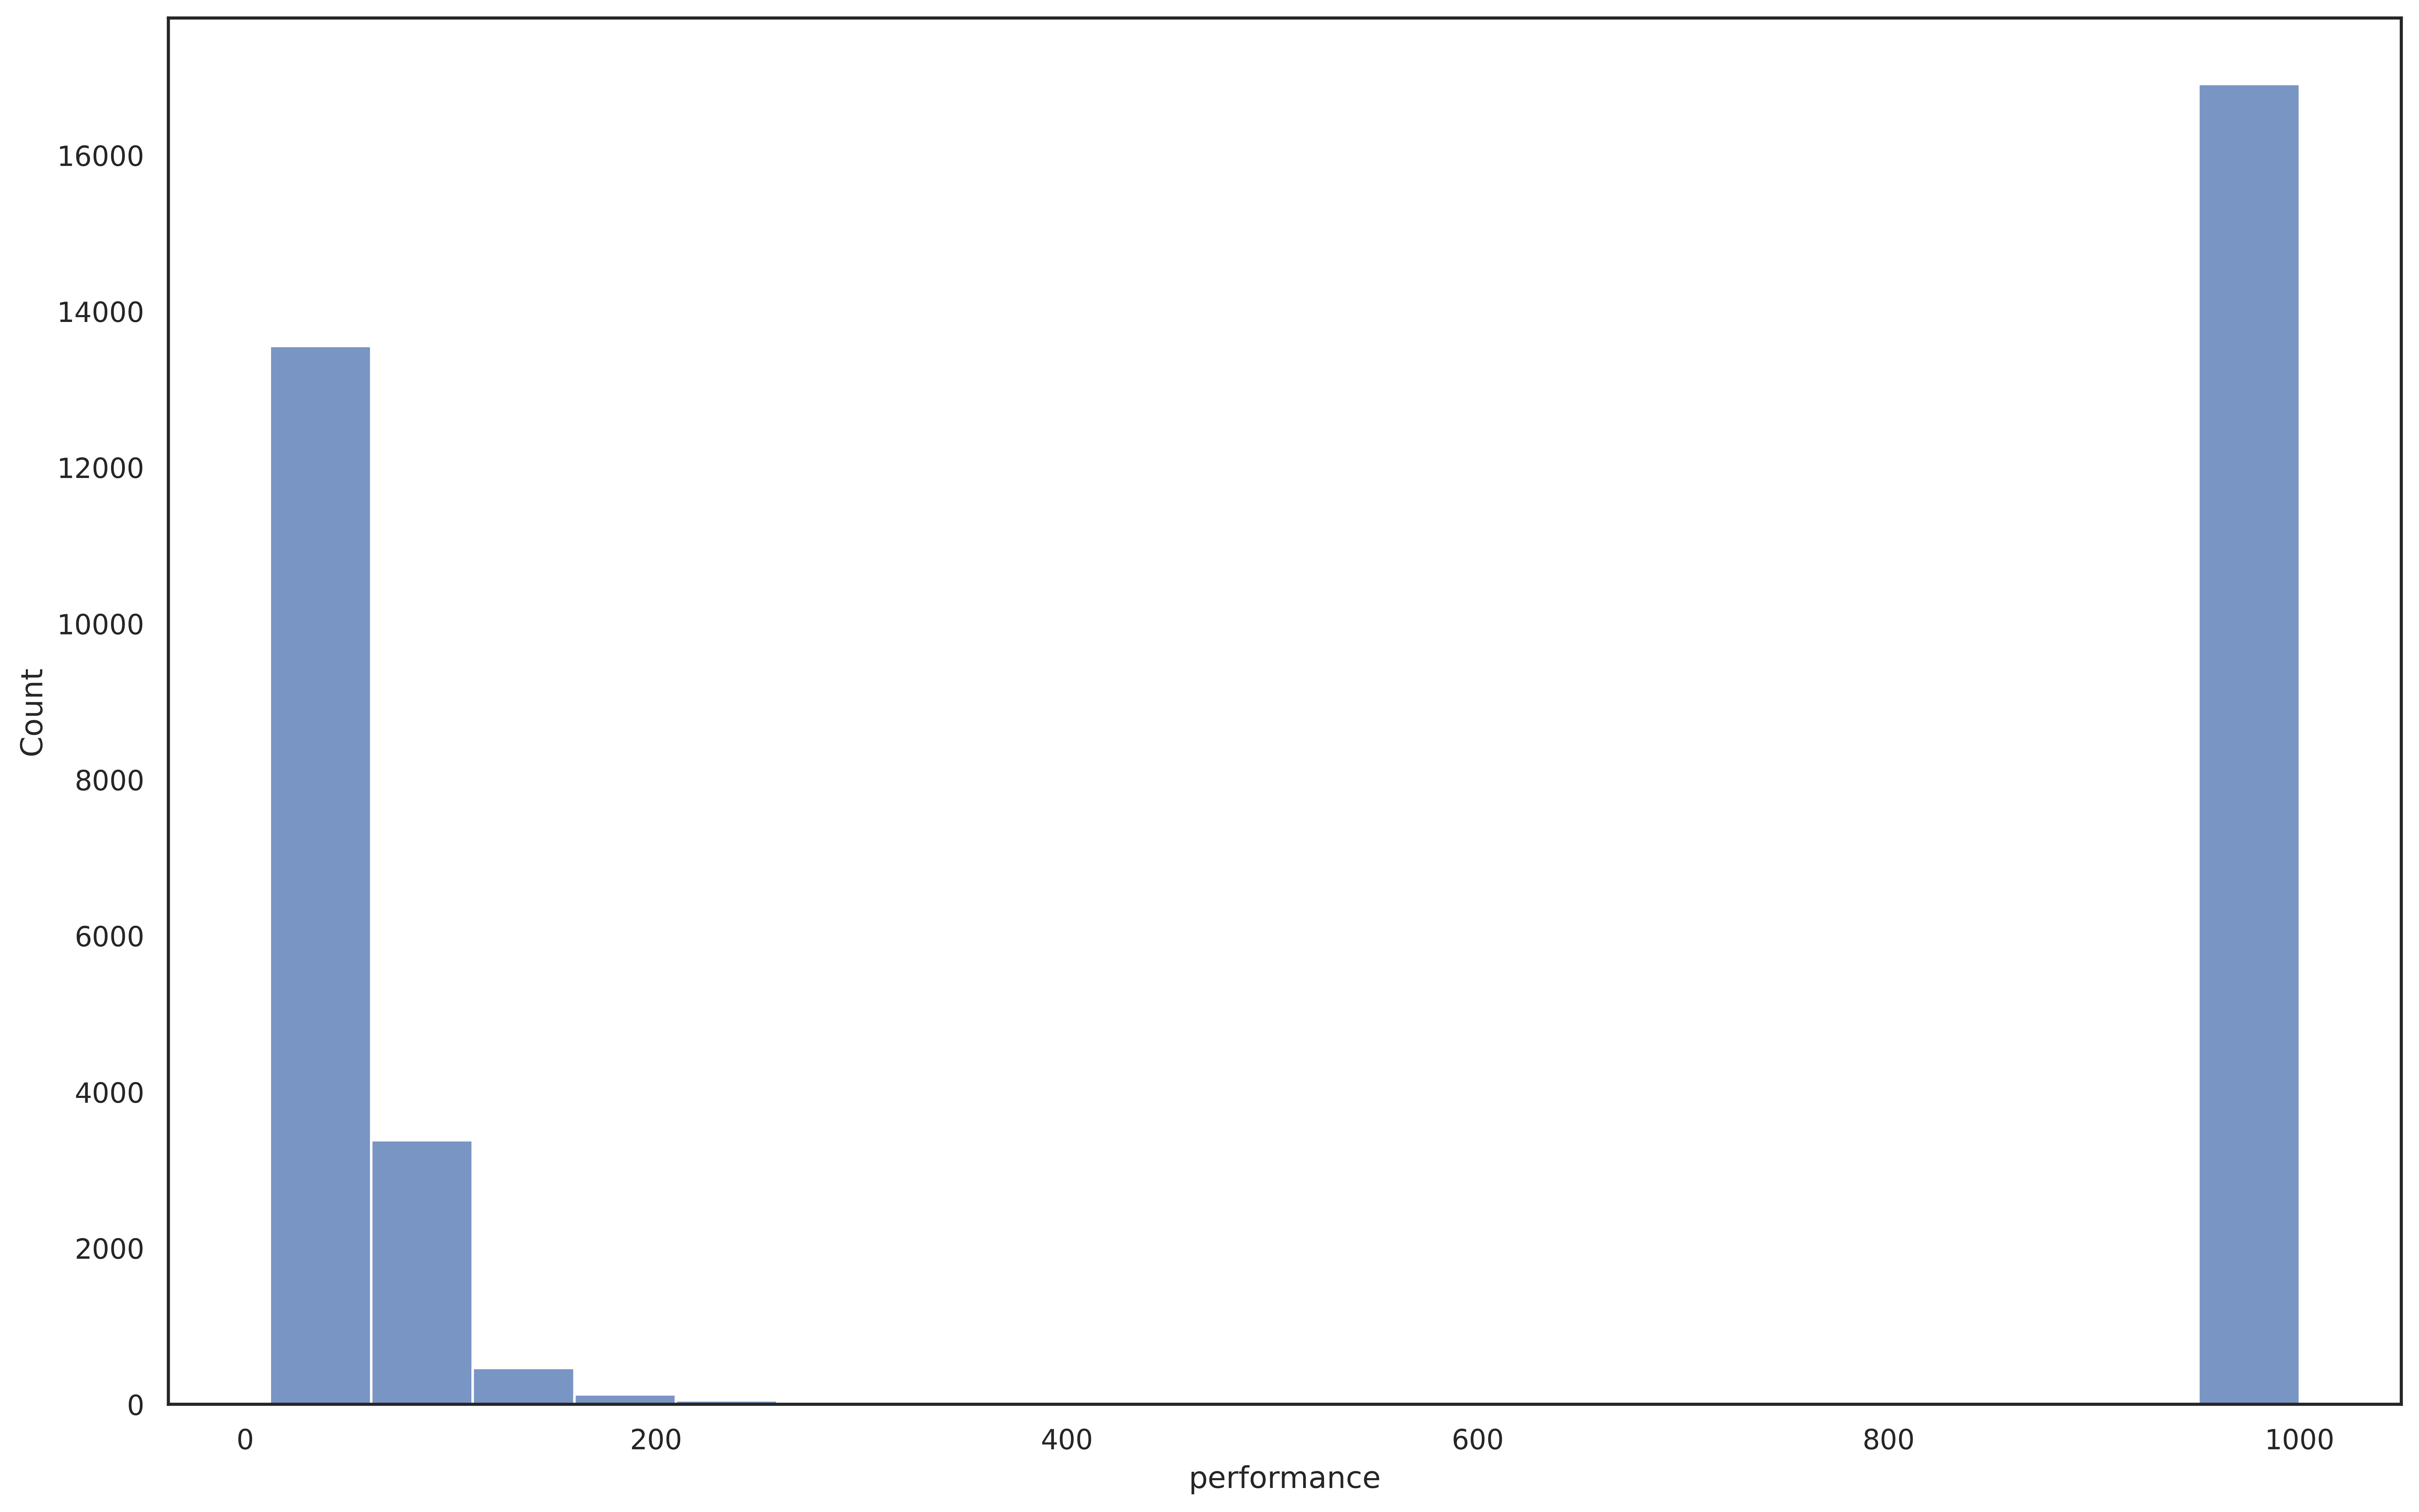

In [19]:
import seaborn as sns
from utils import graph_defaults
graph_defaults()

sns.histplot(y, bins=20)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

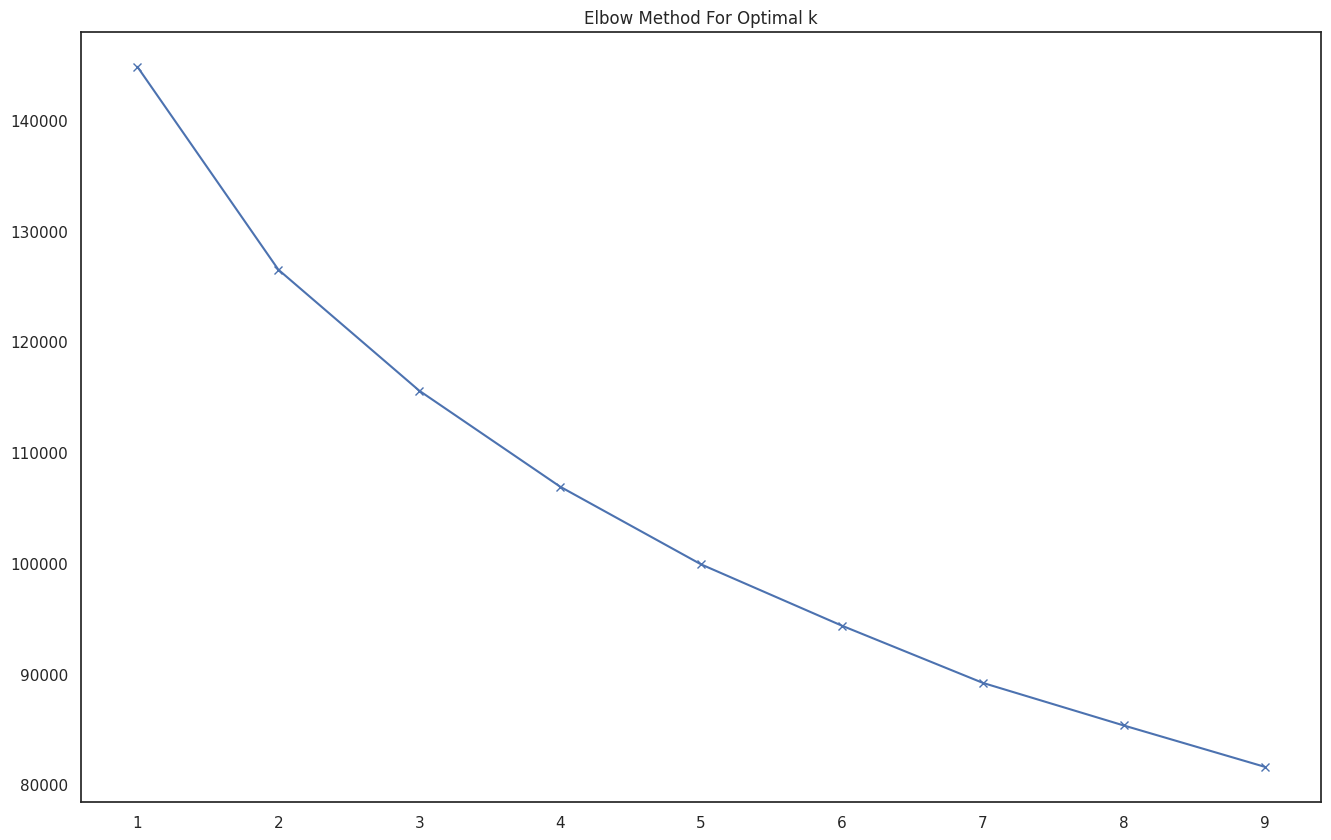

In [22]:
import matplotlib.pyplot as plt

ssd = []
K = range(1, 10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X_train)
    ssd.append(kmeans.inertia_)
plt.plot(K, ssd, 'bx-')
plt.title('Elbow Method For Optimal k')
plt.show()

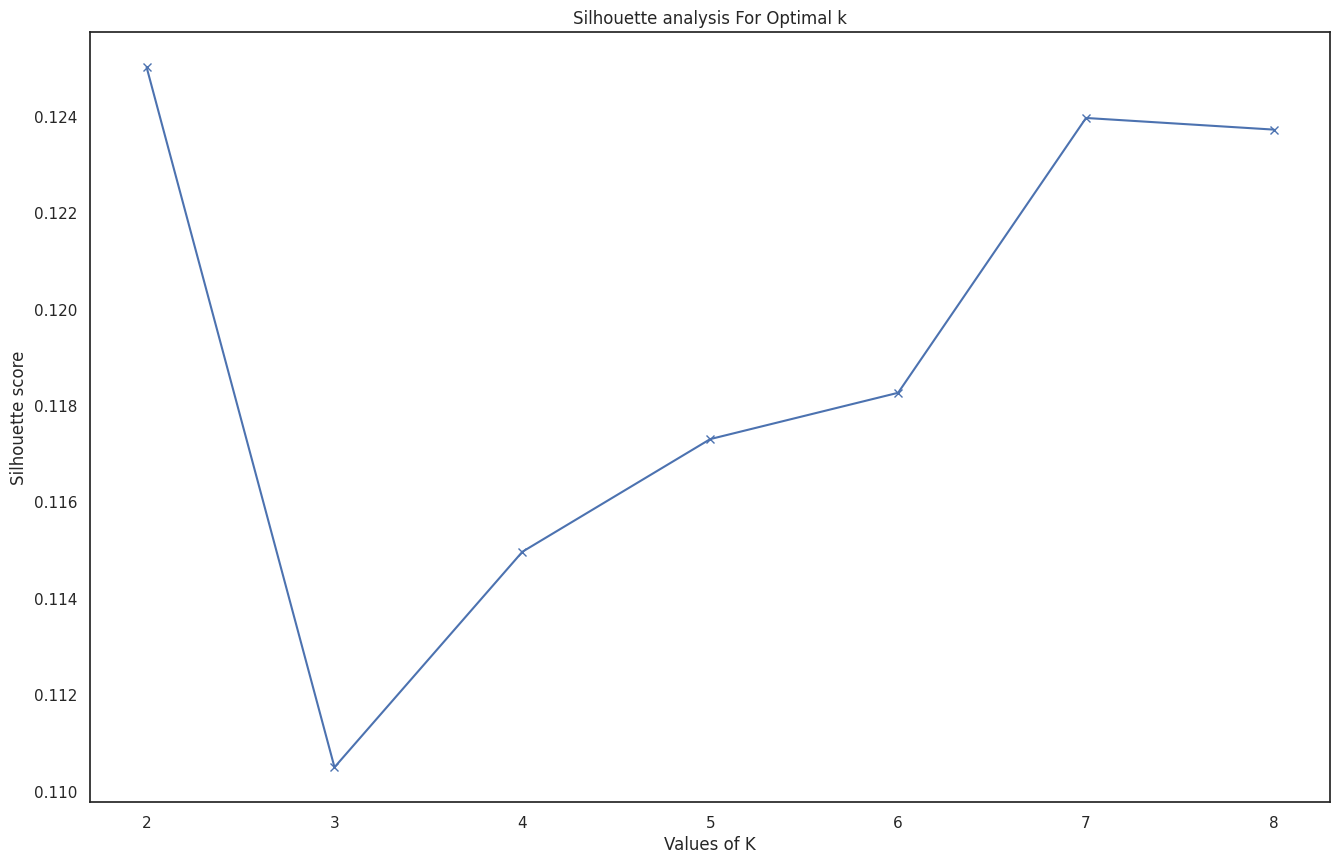

In [23]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X_train)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(X_train, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

[[ 1.11845628e-02 -1.96233146e-02  2.83251196e-02 -7.36784354e-03
  -2.55529332e-03 -8.72072335e-01]
 [-1.21279779e-02  1.85268017e-02 -2.39863667e-02  6.87024669e-03
   5.17402283e-04  8.67246676e-01]]


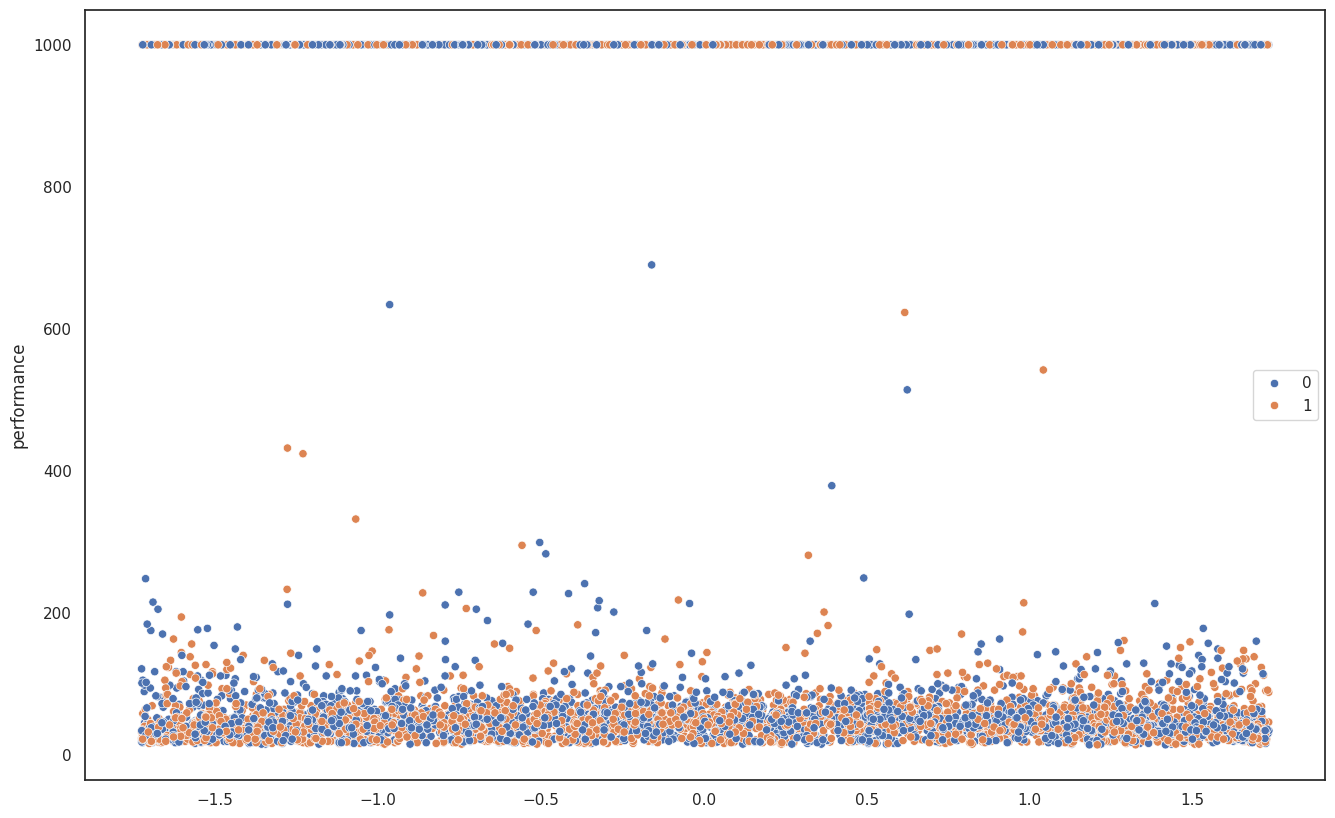

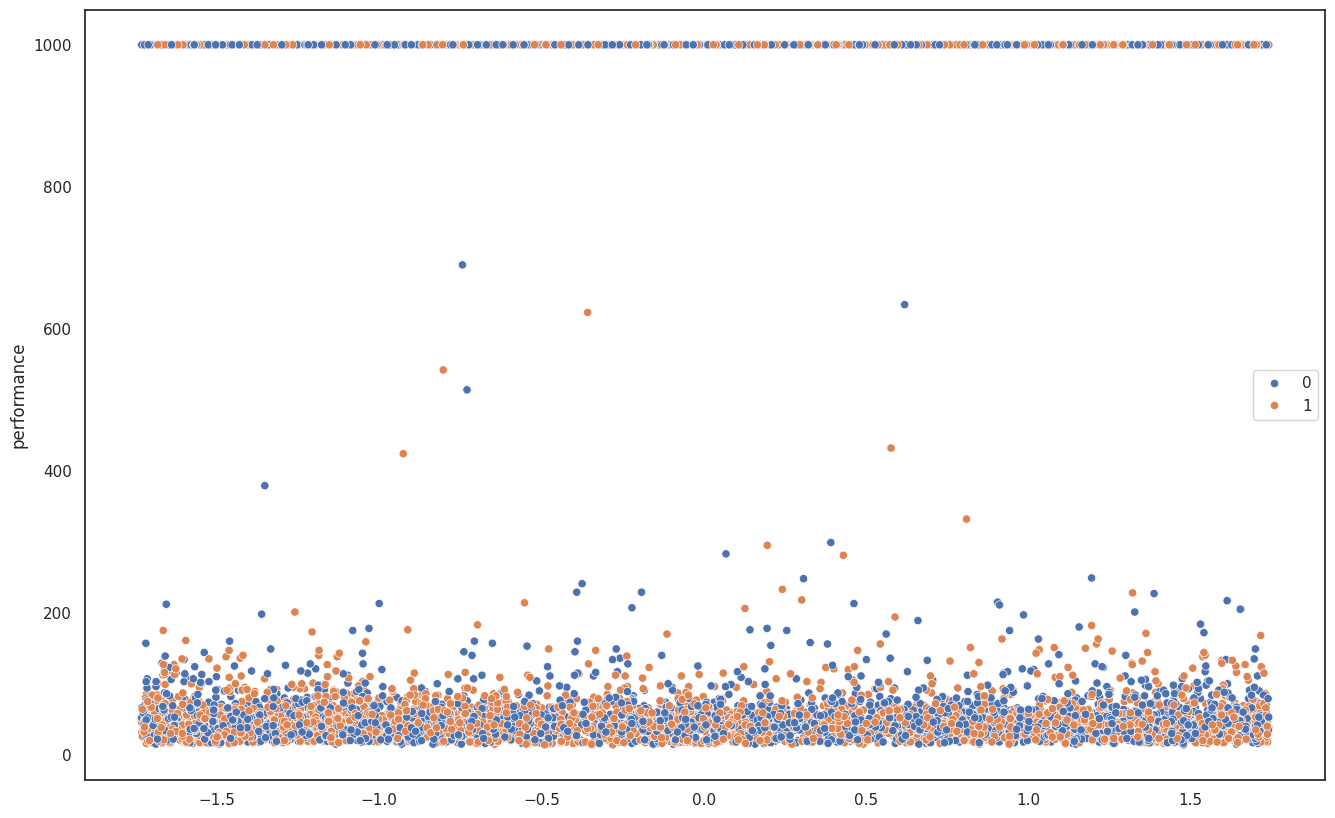

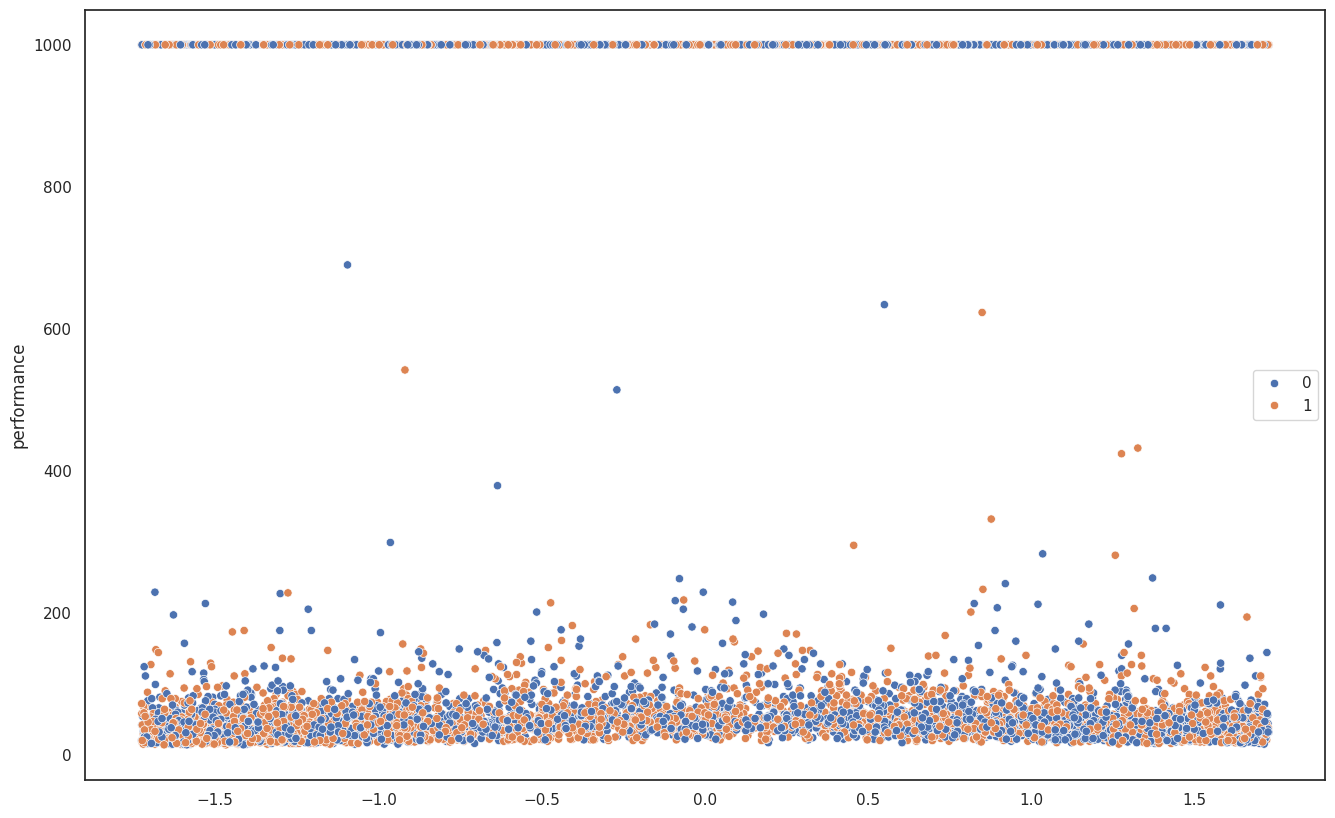

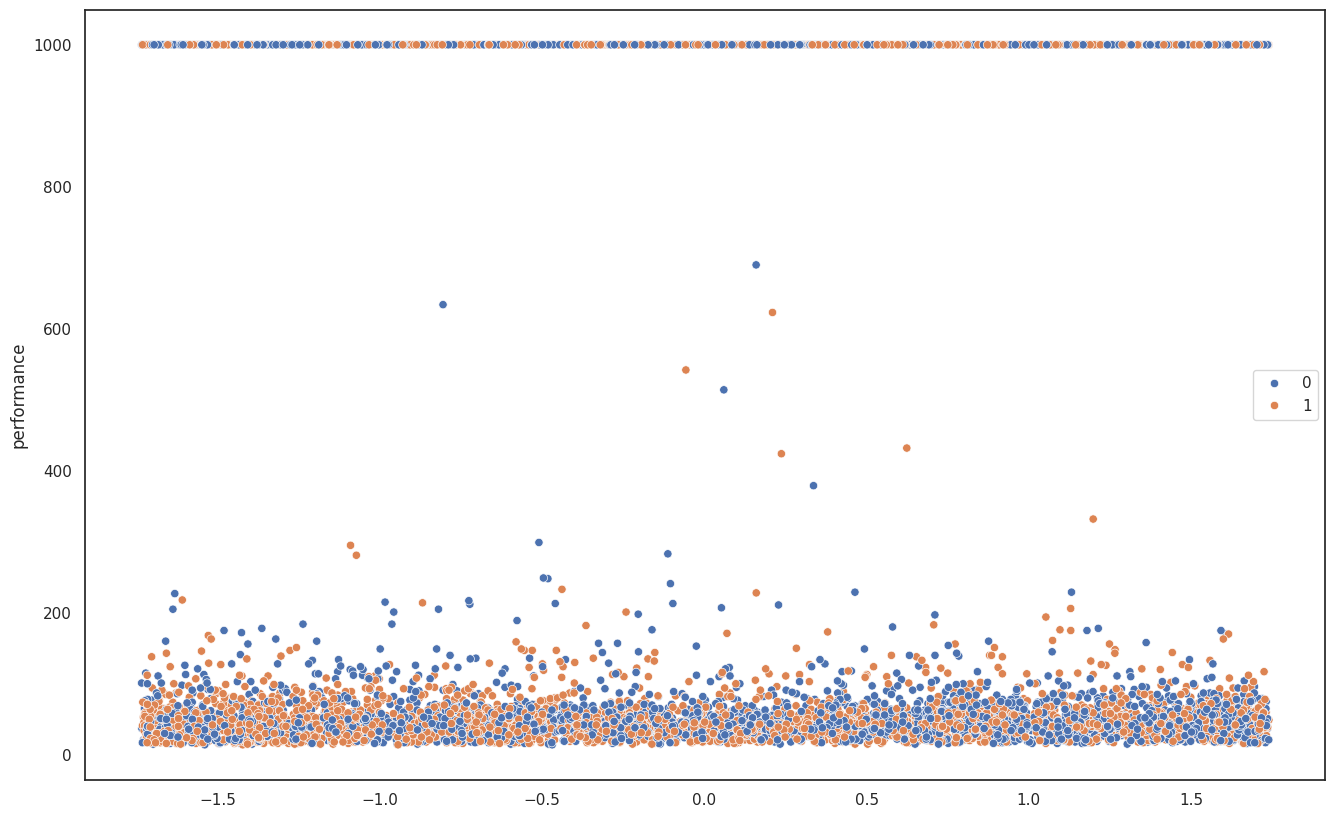

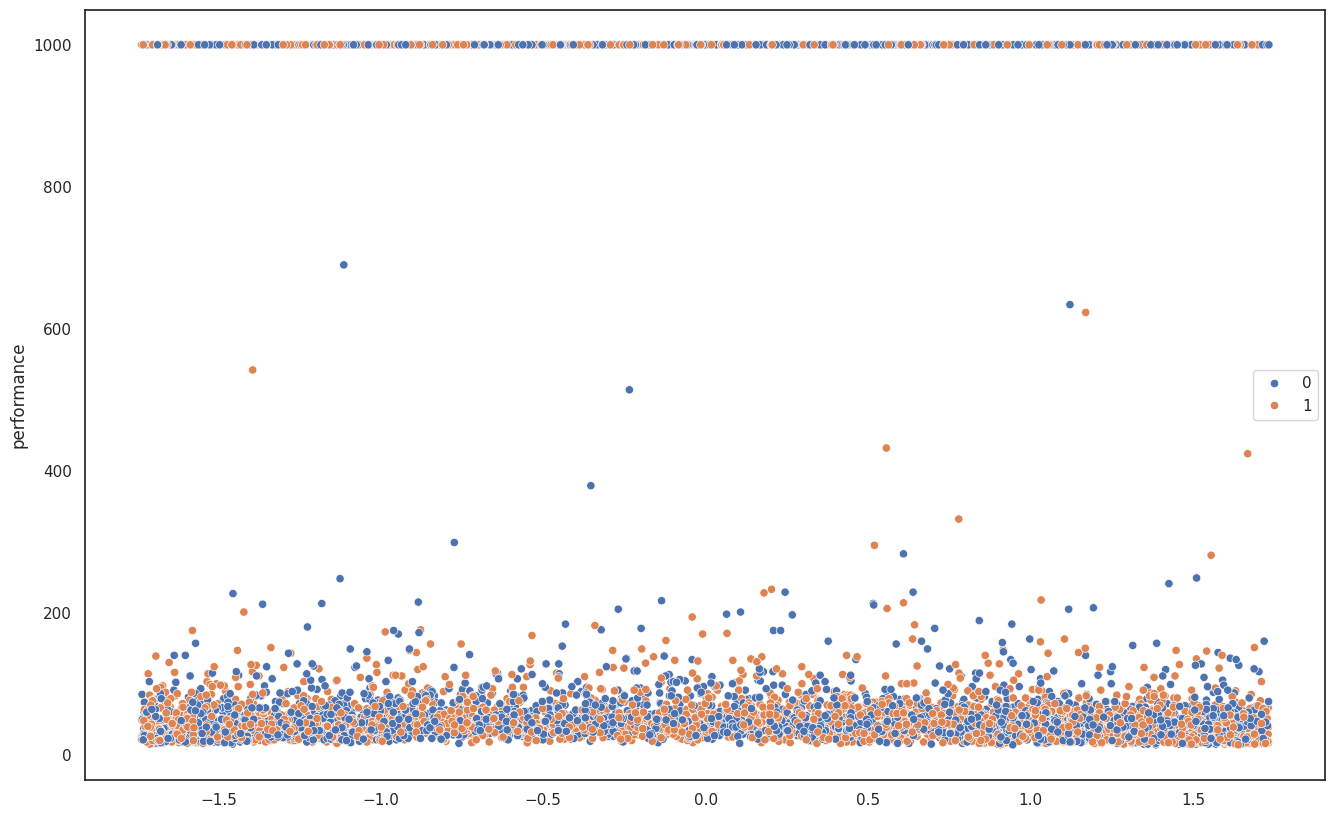

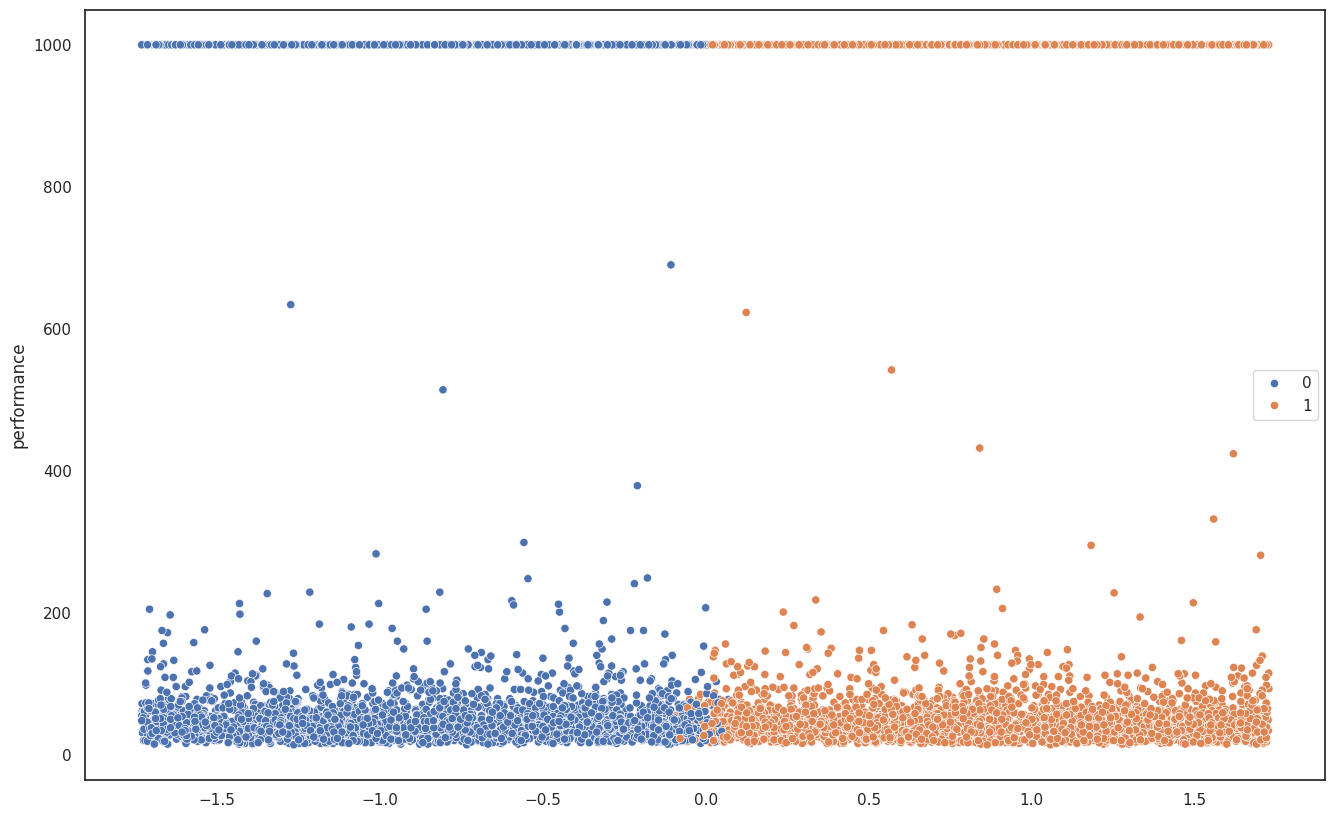

In [37]:
import numpy as np

model = KMeans(
    init="random",
    n_clusters=2,
    random_state=42
)
model.fit(X=X_train)
print(model.cluster_centers_)

y_pred = model.predict(X_test)

X_test_T = np.array(X_test.T)

for i in range(6):
    sns.scatterplot(x=X_test_T[i], y=y_test, hue=y_pred)
    plt.show()

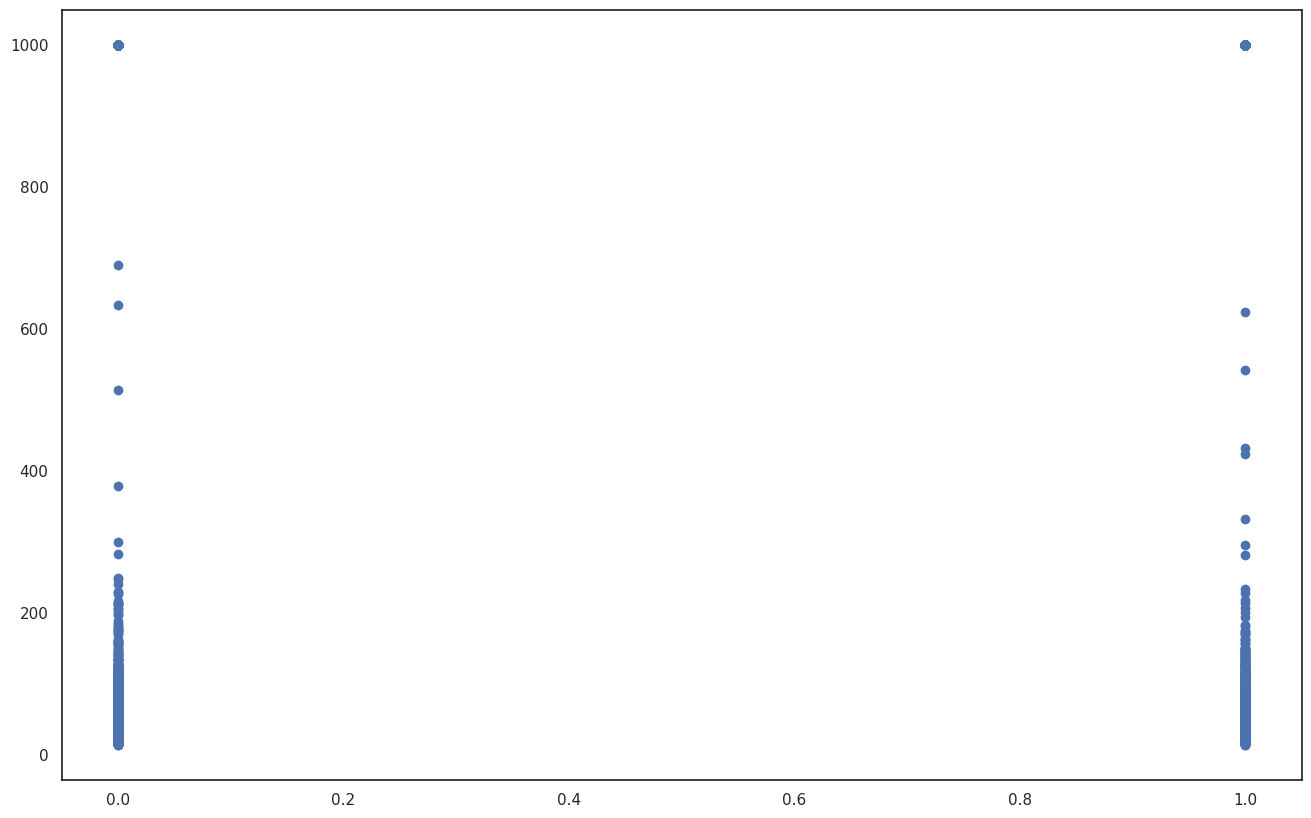

In [36]:
plt.scatter(y_pred, y_test)